# Python bridge 2

[*Tony Yang*](https://github.com/tonyyzy)

*Part of this notebook's material was adapted from the [Software Carpentry](https://swcarpentry.github.io/python-novice-gapminder/09-plotting/index.html) Python course and [Imperial Chemistry Department's Python courses](https://github.com/imperialchem)*

## Introduction

Welcome to the second workshop in the Python bridge series. In this session, we will build upon the NumPy knowledge from last week's session and introduce you to Matplotlib which is the commonly used Python plotting package.  
As always, we will import some libraries:

In [1]:
import numpy as np
# Pyplot is the plotting sublibrary within matplotlib, and commonly abbreviated as plt
import matplotlib.pyplot as plt

## Plotting with matplotlib
Matplotlib is modelled after Matlab's plotting functions and aims to be easy to use and intuitive.  
Firstly, we need to create some datasets, let's plot the sine function from -10 to 10

In [2]:
x = np.linspace(-10, 10, 101)
sine_y = np.sin(x) # here you can see the benefits of a numpy array
              # we can apply a numpy function to the whole array at once
              # rather than looping over all elements of a list!

And here's our first plot!

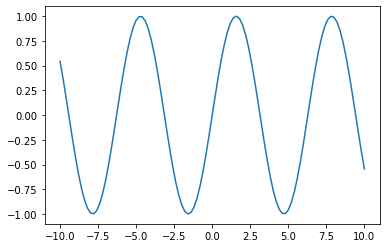

In [3]:
plt.plot(x, sine_y)
plt.show() # Sometimes you may find that without plt.show()
           # the figure is still displayed. This is Jupyter notebook
           # trying to be helpful. Do note that in other environments
           # you will almost definitely need this line.

Note that although we only used two lines to plot the graph matplotlib has set many defaults for us behind the scenes
. Let go over some of the settings so we know how to customise our graphs when we want to.

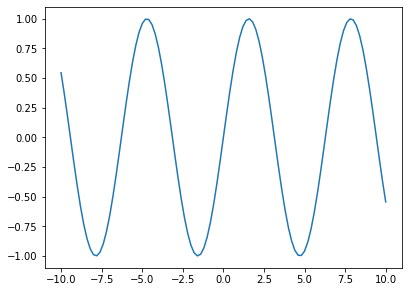

In [4]:
# Create a new figure of size 6.4 by 4.8 inches (width and height)
plt.figure(figsize=(6.4, 4.8))

# Plot x and y using color blue from the Tableau palette
# with a continuous line of width 1.5 points without any markers
plt.plot(x, sine_y, color="tab:blue", linewidth=1.5, linestyle="-", marker="")

# Set x limits to be slightly bigger than the data range
plt.xlim(-11, 11)

# Set x ticks to be nine ticks evenly spaced between -10 and 10
plt.xticks(np.linspace(-10, 10, 9))

# Set y limits
plt.ylim(-1.1, 1.1)

# Set y ticks
plt.yticks(np.linspace(-1, 1, 9))

# Show the plot on screen
plt.show()

### More choices of colors, linestyles, and markers
List of colors: https://matplotlib.org/3.1.0/gallery/color/named_colors.html  
List of linestyles: https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html  
List of markers: https://matplotlib.org/api/markers_api.html

## Completing a plot
It's always a good idea to label your graphs! Here we can add a title, x/y axis labels, and a legend.

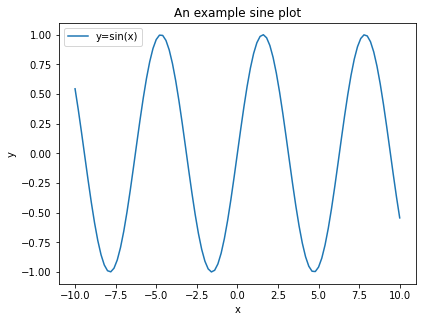

In [5]:
plt.figure(figsize=(6.4, 4.8))
plt.plot(x, sine_y, label="y=sin(x)")
plt.title("An example sine plot") # add title to the plot
plt.xlabel("x") # label the axes
plt.ylabel("y")
plt.legend() # show legend
plt.show()

We can also plot multiple lines on the same graph.

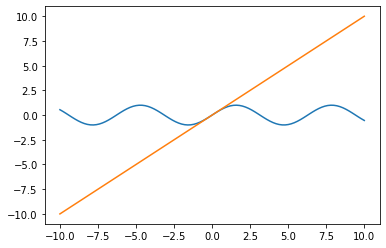

In [6]:
plt.plot(x, sine_y, label="y=sin(x)")
plt.plot(x, x, label="y=x")
plt.show()

### Exercise 1
- plot both sine and cosine functions on the same graph
- Use `tab:purple` as color, `--` as linestyle, `*` as marker for cosine
- Take your pick of options for sine
- Make sure to give your plot a title, axis labels, and legends

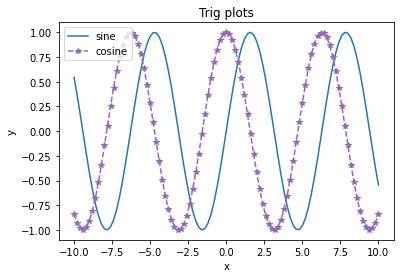

In [7]:
plt.plot(x, sine_y, label="sine")
plt.plot(x, np.cos(x), color="tab:purple", linestyle="--", marker="*", label="cosine")
plt.title("Trig plots")
plt.ylabel("y")
plt.xlabel("x")
plt.legend(loc="upper left")
plt.show()

## More types of plots

We have covered lineplot so far, now let's dive into scatter and bar plots, and histogram

If we only want to plot the datapoints without the contineous lines we can use scatter plot.

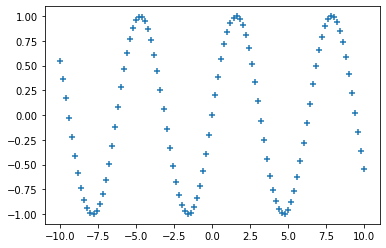

In [8]:
plt.scatter(x, sine_y, marker="+")
plt.show()

Bar plot is useful when displaying categorical data.

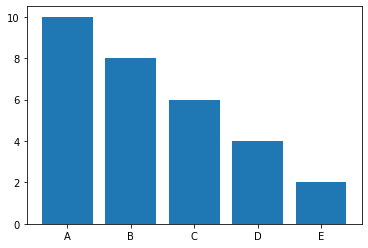

In [9]:
bar_x = ["A", "B", "C", "D", "E"]
bar_y = np.array(range(10, 0, -2))
plt.bar(bar_x, bar_y)
plt.show()

Finally we can use histograms to show distributions or a range of measurements. Pay attention to how the number of bins for histogram is determined. A too small or too large number of bins may hide or amplify some features of the data.

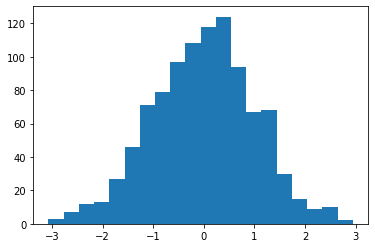

In [10]:
rand_num = np.random.randn(1000) # generate 1000 random numbers from the standard normal distribution
plt.hist(rand_num, bins=20) # we can change bins to change how the histogram looks
plt.show()

## Decorate figures
We can customise our figures to add error bars or show confidence intervals

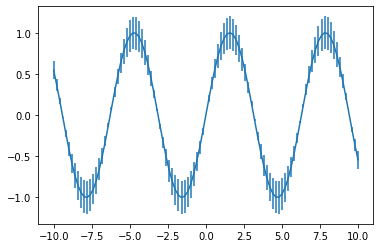

In [11]:
error = sine_y * 0.2 # let's assume the error is proportional to the y value
plt.errorbar(x, sine_y, yerr=error) # we use errorbar to plot a lineplot with error bars
                               # yerr and xerr are the keyword arguments for inputing error bar values
plt.show()

Error bars can be added to bar plots in the similar fashion.

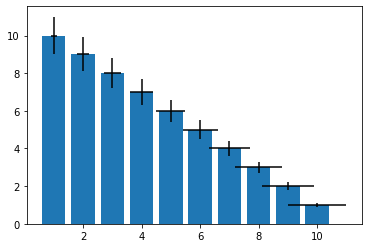

In [12]:
bar_x = np.array(range(1, 11))
bar_y = np.array((range(10, 0, -1)))
plt.bar(bar_x, bar_y, yerr=0.1 * bar_y, xerr=0.1 * bar_x)
plt.show()

### Confidence interval

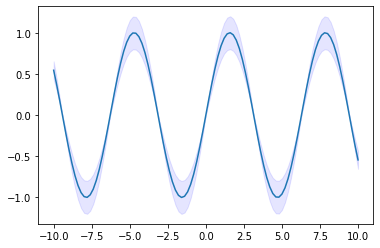

In [13]:
ci = sine_y * 0.2 # Let's assume our confidence interval is proportional to the y value as well
plt.plot(x, sine_y)
plt.fill_between(x, (sine_y-ci), (sine_y+ci), color='b', alpha=0.1) # use fill_between to color a region on the graph
# plt.fill_between(x, sine_y, 0, color='b', alpha=0.1)
plt.show()

### Exercise 2
Plot the function $y=x^2$ for x from -10 to 10 and fill the area under the curve between 2.5 and 7.5

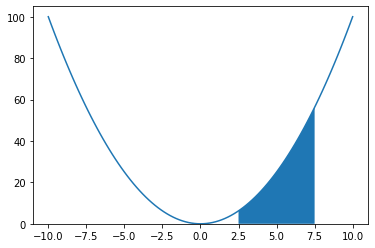

In [14]:
plt.plot(x, x ** 2)
plt.fill_between(np.linspace(2.5, 7.5), 0, np.linspace(2.5, 7.5) ** 2)
plt.ylim(bottom=0)
plt.show()

## Miniproject -  Bond enthalpy of noble gas dimmers
`He2.csv`, `Ne2.csv`, `Ar2.csv`, and `Kr2.csv` are csv files contain two columns of data. The first column is the internuclear distance between the two noble gas atoms and the second column is the interaction energy in hatrees.

### Exercise 3: plotting the bond enthalpy curve
1. load the `He2.csv` file with [np.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html) and use `,` as the delimiter
2. plot the enthalpy vs bond distance as a scatter plot (hint: use array indexing to select the first and the second column)
3. make sure to add labels, legend, and a sensible title

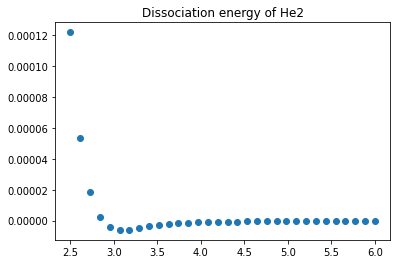

In [15]:
He2 = np.loadtxt("../He2.csv", delimiter=",")
plt.scatter(He2[:, 0], He2[:, 1])
plt.title("Dissociation energy of He2")
plt.show()

### Curve fitting

When we want to fit a curve to a series of observed datapoints, we can use SciPy's [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html) function.

In [16]:
from scipy.optimize import curve_fit

For our toy example, we will plot $y=ax + b$ and use curve_fit to find the values of a and b from the sythesised datapoints.

In [17]:
# Let's make our datapoints
x = np.linspace(0, 10, 11)
y = 3 * x + 4

In [18]:
print(x, y)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.] [ 4.  7. 10. 13. 16. 19. 22. 25. 28. 31. 34.]


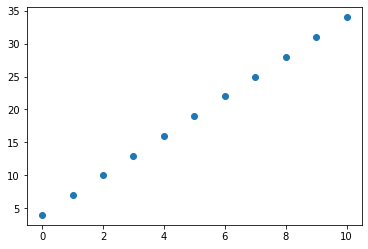

In [19]:
plt.scatter(x, y)
plt.show()

To begin fitting a curve, we first need to define the equation of the line/curve.

In [20]:
def linear(x, a, b):
    return a * x + b

We have defined a linear function and now it's time to use curve_fit to find parameters a and b

In [21]:
curve_fit(linear, x, y) # at the least, curve_fit takes three arguments.
                        # the first is the function for the curve
                        # the second is the independent varibale
                        # the third is the dependent variable

(array([3., 4.]), array([[ 5.73717022e-32, -2.86858511e-31],
        [-2.86858511e-31,  2.00800958e-30]]))

### Exercise 4: Morse potential
The shape of dissociation curve can be modeled mathematically by the Morse potential:

$$V(r) = d ((1 - e^{-a(r - r_e)})^2 -1),$$

where *r<sub>e</sub>* is the equilibrium distance, *d* is the dissociation energy, and the *a* is related to the frequency of the potential well.

Write a function to compute the Morse potential with *r*, *r<sub>e</sub>*, *d* and *a* as arguments to the function, making sure the arguments are defined in this order.

In [22]:
def morse(r, re, d, a):
    return d * ((1 - np.exp(- a * (r - re))) ** 2 -1)

Run the following cell to make sure your `morse` function works as expected.

In [23]:
if abs(morse(2.0, 1.0, 3.2, 5.2) - -0.035208628347242053) < 1e-8:
    print('Well Done your Morse function works.')
else:
    print('Your Morse function is wrong!')

Well Done your Morse function works.


### Exercise 5: Fit the Morse function to find the values of $r_e$, $d$, and $a$

Use curve_fit to find the values of $r_e$, $d$, and $a$. For a complex function like Morse, it's necessary to supply initial guesses of the values to nudge the curve fitting algorithm towards the right direction. Think of the meaning of $r_e$ and $d$ in order to find a suitable first guess. A common value like 1 can be used for $a$ since no sensible initial guess can be derived from the data.

Provide initial guesses as a list for argument `p0`: `curve_fit(..., p0=[...])`

- Fit the Morse function to find the values of the parameters
- Plot the fitted curve as a lineplot along with the scatterplot of the data
- Does your fitted curve look close enough to the original data?

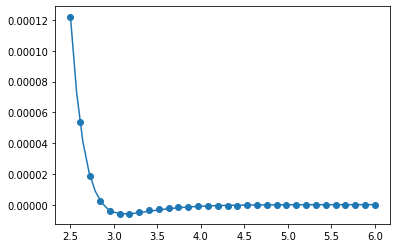

In [24]:
min_enthalpy_index = He2[:, 1].argmin()
re_init = He2[min_enthalpy_index, 0]
d_init = -min(He2[:, 1])
r, re, d = curve_fit(morse, He2[:, 0], He2[:, 1], p0=[re_init, d_init, 1])[0]
x = np.linspace(min(He2[:, 0]), max(He2[:, 0]))
y = morse(x, r, re, d)
plt.plot(x, y)
plt.scatter(He2[:, 0], He2[:, 1])
plt.show()

#### Extra
Repeat the same curve fitting steps to determine and plot the Morse curves for `He2`, `Ne2`, `Ar2`, and `Kr2` on the same graph. What do you see?

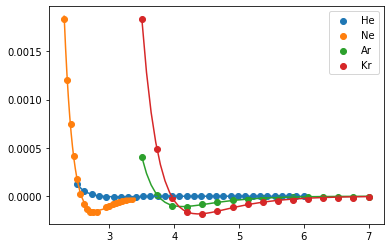

In [25]:
for atom in ["He", "Ne", "Ar", "Kr"]:
    data = np.loadtxt(f"../{atom}2.csv", delimiter=",")
    min_enthalpy_index = data[:, 1].argmin()
    re_init = data[min_enthalpy_index, 0]
    d_init = -min(data[:, 1])
    re, d, a = curve_fit(morse, data[:, 0], data[:, 1], p0=[re_init, d_init, 1])[0]
    x = np.linspace(min(data[:, 0]), max(data[:, 0]))
    y = morse(x, re, d, a)
    plt.plot(x, y)
    plt.scatter(data[:, 0], data[:, 1], label=atom)
plt.legend()
plt.show()


## Finishing remarks

Well done! We have learnt how to make and customise many types of figures today. Although these functions are very powerful we only covered a very small portion of matplotlib. Be sure to check out [matplotlib's gallery](https://matplotlib.org/3.1.1/gallery/index.html) to glance over all the pretty figures you can make.

[Seaborn](https://seaborn.pydata.org/examples/index.html) is a library built on top of matplotlib to give you simpler access to commonly used statistical graphics. But it does not provide the granular control that matplotlib offers.